# **Computational Drug Discovery - SOAT-1 : Exploratory Data Analysis Part 02**

Khalid El Akri

[*'Chem Code Professor' YouTube channel*](http://youtube.com/@chemcodeprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the Bindingdb bioactivity data.

In this **Part 02**, we will be performing Descriptor Calculation and Exploratory Data Analysis. Let get started! Shall we ;)

---

## **Install rdkit**

In [1]:
! pip install rdkit

## **Load SOAT-2 bioactivity data**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('final_output.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [6]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df.mol_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [8]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,511.538,4.24260,0.0,8.0
1,466.541,4.33440,0.0,6.0
2,474.520,4.20190,0.0,6.0
3,468.557,4.43630,0.0,6.0
4,519.787,4.79192,1.0,9.0
...,...,...,...,...
1698,522.759,7.24280,2.0,4.0
1699,643.760,8.43080,2.0,6.0
1700,527.738,7.06380,2.0,4.0
1701,492.624,6.02160,1.0,7.0


In [9]:
df

,mol_bdID,mol_smiles,bioactivity_class,mol_IC50
0,50648002,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,1.4
1,50648007,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,1.7
2,50647999,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(Cc1cccc...,active,2.6
3,50648003,CC(C)CC(C)N1Cc2c(n(CC(=O)c3ccccc3)c3cc(-c4cccc...,active,3.0
4,51138741,CSc1cc(C)nc(SC)c1NC(=O)CN1CCN(CCSc2nc3ccccc3s2...,active,3.0
...,...,...,...,...
1698,50051759,CCCCCCCN(CCOCCSc1nc(-c2ccccc2)c(-c2ccccc2)[nH]...,active,190.0
1699,50004370,COc1ccc(-c2nc(SCCCCCN(Cc3ccccn3)C(=O)Nc3ccc(F)...,active,190.0
1700,50004374,CC(C)NC(=O)N(CCCCCSc1nc(-c2ccccc2)c(-c2ccccc2)...,active,190.0
1701,50004847,CCCCCCCCCCCCn1nnnc1C(NC(=O)c1cccc([N+](=O)[O-]...,active,190.0


In [10]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [11]:
df_combined

,mol_bdID,mol_smiles,bioactivity_class,mol_IC50,MW,LogP,NumHDonors,NumHAcceptors
0,50648002,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,1.4,511.538,4.24260,0.0,8.0
1,50648007,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,1.7,466.541,4.33440,0.0,6.0
2,50647999,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(Cc1cccc...,active,2.6,474.520,4.20190,0.0,6.0
3,50648003,CC(C)CC(C)N1Cc2c(n(CC(=O)c3ccccc3)c3cc(-c4cccc...,active,3.0,468.557,4.43630,0.0,6.0
4,51138741,CSc1cc(C)nc(SC)c1NC(=O)CN1CCN(CCSc2nc3ccccc3s2...,active,3.0,519.787,4.79192,1.0,9.0
...,...,...,...,...,...,...,...,...
1698,50051759,CCCCCCCN(CCOCCSc1nc(-c2ccccc2)c(-c2ccccc2)[nH]...,active,190.0,522.759,7.24280,2.0,4.0
1699,50004370,COc1ccc(-c2nc(SCCCCCN(Cc3ccccn3)C(=O)Nc3ccc(F)...,active,190.0,643.760,8.43080,2.0,6.0
1700,50004374,CC(C)NC(=O)N(CCCCCSc1nc(-c2ccccc2)c(-c2ccccc2)...,active,190.0,527.738,7.06380,2.0,4.0
1701,50004847,CCCCCCCCCCCCn1nnnc1C(NC(=O)c1cccc([N+](=O)[O-]...,active,190.0,492.624,6.02160,1.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``mol_IC50`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``mol_IC50`` column and create a new ``pIC50`` column

In [12]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['mol_IC50_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns='mol_IC50_norm')
        
    return x

#### Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [13]:
df_combined.mol_IC50.describe()

count    1.703000e+03
mean     1.943540e+04
std      8.218189e+04
min      1.400000e+00
25%      1.600000e+02
50%      1.200000e+03
75%      1.000000e+04
max      1.140000e+06
Name: mol_IC50, dtype: float64

In [14]:
-np.log10( (10**-9)* 100000000 )

1.0

In [15]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [16]:
def norm_value(input):
    norm = []

    for i in input['mol_IC50']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['mol_IC50_norm'] = norm
    x = input.drop(labels='mol_IC50', axis=1)
        
    return x

#### We will first apply the norm_value() function so that the values in the standard value of mol_IC50 column is normalized.

In [17]:
df_norm = norm_value(df_combined)
df_norm

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,mol_IC50_norm
0,50648002,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,511.538,4.24260,0.0,8.0,1.4
1,50648007,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,466.541,4.33440,0.0,6.0,1.7
2,50647999,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(Cc1cccc...,active,474.520,4.20190,0.0,6.0,2.6
3,50648003,CC(C)CC(C)N1Cc2c(n(CC(=O)c3ccccc3)c3cc(-c4cccc...,active,468.557,4.43630,0.0,6.0,3.0
4,51138741,CSc1cc(C)nc(SC)c1NC(=O)CN1CCN(CCSc2nc3ccccc3s2...,active,519.787,4.79192,1.0,9.0,3.0
...,...,...,...,...,...,...,...,...
1698,50051759,CCCCCCCN(CCOCCSc1nc(-c2ccccc2)c(-c2ccccc2)[nH]...,active,522.759,7.24280,2.0,4.0,190.0
1699,50004370,COc1ccc(-c2nc(SCCCCCN(Cc3ccccn3)C(=O)Nc3ccc(F)...,active,643.760,8.43080,2.0,6.0,190.0
1700,50004374,CC(C)NC(=O)N(CCCCCSc1nc(-c2ccccc2)c(-c2ccccc2)...,active,527.738,7.06380,2.0,4.0,190.0
1701,50004847,CCCCCCCCCCCCn1nnnc1C(NC(=O)c1cccc([N+](=O)[O-]...,active,492.624,6.02160,1.0,7.0,190.0


In [18]:
df_norm.mol_IC50_norm.describe()

count    1.703000e+03
mean     1.943540e+04
std      8.218189e+04
min      1.400000e+00
25%      1.600000e+02
50%      1.200000e+03
75%      1.000000e+04
max      1.140000e+06
Name: mol_IC50_norm, dtype: float64

In [19]:
df_final = pIC50(df_norm)
df_final

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,50648002,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,511.538,4.24260,0.0,8.0,8.853872
1,50648007,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,466.541,4.33440,0.0,6.0,8.769551
2,50647999,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(Cc1cccc...,active,474.520,4.20190,0.0,6.0,8.585027
3,50648003,CC(C)CC(C)N1Cc2c(n(CC(=O)c3ccccc3)c3cc(-c4cccc...,active,468.557,4.43630,0.0,6.0,8.522879
4,51138741,CSc1cc(C)nc(SC)c1NC(=O)CN1CCN(CCSc2nc3ccccc3s2...,active,519.787,4.79192,1.0,9.0,8.522879
...,...,...,...,...,...,...,...,...
1698,50051759,CCCCCCCN(CCOCCSc1nc(-c2ccccc2)c(-c2ccccc2)[nH]...,active,522.759,7.24280,2.0,4.0,6.721246
1699,50004370,COc1ccc(-c2nc(SCCCCCN(Cc3ccccn3)C(=O)Nc3ccc(F)...,active,643.760,8.43080,2.0,6.0,6.721246
1700,50004374,CC(C)NC(=O)N(CCCCCSc1nc(-c2ccccc2)c(-c2ccccc2)...,active,527.738,7.06380,2.0,4.0,6.721246
1701,50004847,CCCCCCCCCCCCn1nnnc1C(NC(=O)c1cccc([N+](=O)[O-]...,active,492.624,6.02160,1.0,7.0,6.721246


In [20]:
df_final.pIC50.describe()

count    1703.000000
mean        5.900156
std         1.141998
min         2.943095
25%         5.000000
50%         5.920819
75%         6.795880
max         8.853872
Name: pIC50, dtype: float64

In [21]:
df_final.to_csv('soat_1_bioa_data_preprocessed.csv', index=False)

In [22]:
! ls -l

total 58280
-rw-r--r--@  1 akrikhalid  staff     16872 May 29 14:44 IC50.csv
-rw-r--r--   1 akrikhalid  staff   3041472 May 29 14:36 Output3_Sterol O-acyltransferase 1 inhibitors 1703.csv
drwxr-xr-x   2 akrikhalid  staff        64 May 29 14:22 PDFs
drwxr-xr-x  21 akrikhalid  staff       672 May 24 13:06 PaDel-Descriptor
-rw-r--r--@  1 akrikhalid  staff       231 May 24 10:18 PaDel-Descriptor.sh
-rw-r--r--@  1 akrikhalid  staff    211058 May 29 10:05 PaDel-Descriptor.zip
-rw-r--r--@  1 akrikhalid  staff    129784 May 29 16:15 Sterol O-acyltransferase 1 inhibitors 1703 Part 01.ipynb
-rw-r--r--@  1 akrikhalid  staff    250828 May 29 16:17 Sterol O-acyltransferase 1 inhibitors 1703 Part 02.ipynb
-rw-r--r--@  1 akrikhalid  staff     89689 May 29 10:53 Sterol O-acyltransferase 1 inhibitors 1703 Part 03.ipynb
-rw-r--r--@  1 akrikhalid  staff     76160 May 29 11:06 Sterol O-acyltransferase 1 inhibitors 1703 Part 04.ipynb
-rw-r--r--@  1 akrikhalid  staff  11072364 May 28 23:26 Sterol O-acyltran

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [39]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,50648002,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,511.538,4.24260,0.0,8.0,8.853872
1,50648007,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(C1CCCCC...,active,466.541,4.33440,0.0,6.0,8.769551
2,50647999,O=C(Cn1c2c(c(=O)n3nc(-c4ccccc4)cc13)CN(Cc1cccc...,active,474.520,4.20190,0.0,6.0,8.585027
3,50648003,CC(C)CC(C)N1Cc2c(n(CC(=O)c3ccccc3)c3cc(-c4cccc...,active,468.557,4.43630,0.0,6.0,8.522879
4,51138741,CSc1cc(C)nc(SC)c1NC(=O)CN1CCN(CCSc2nc3ccccc3s2...,active,519.787,4.79192,1.0,9.0,8.522879
...,...,...,...,...,...,...,...,...
1698,50051759,CCCCCCCN(CCOCCSc1nc(-c2ccccc2)c(-c2ccccc2)[nH]...,active,522.759,7.24280,2.0,4.0,6.721246
1699,50004370,COc1ccc(-c2nc(SCCCCCN(Cc3ccccn3)C(=O)Nc3ccc(F)...,active,643.760,8.43080,2.0,6.0,6.721246
1700,50004374,CC(C)NC(=O)N(CCCCCSc1nc(-c2ccccc2)c(-c2ccccc2)...,active,527.738,7.06380,2.0,4.0,6.721246
1701,50004847,CCCCCCCCCCCCn1nnnc1C(NC(=O)c1cccc([N+](=O)[O-]...,active,492.624,6.02160,1.0,7.0,6.721246


#### Now we have only 1275 entries instead of 1703 entries 

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [24]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

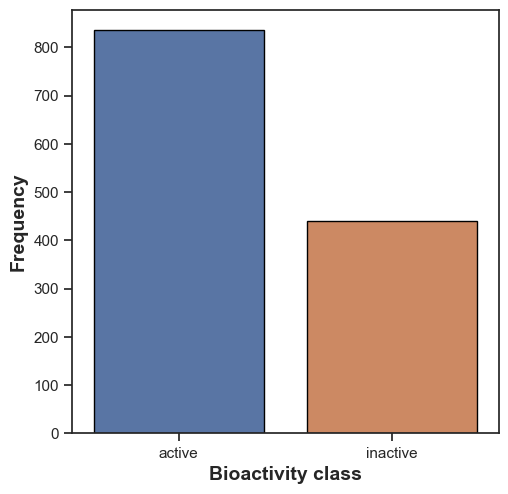

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

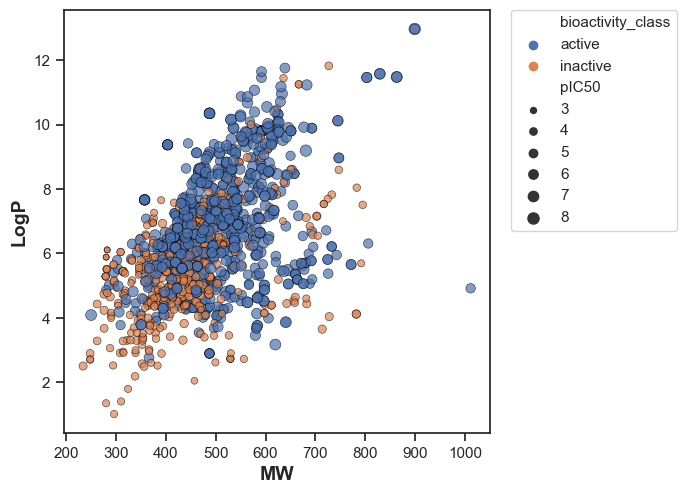

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

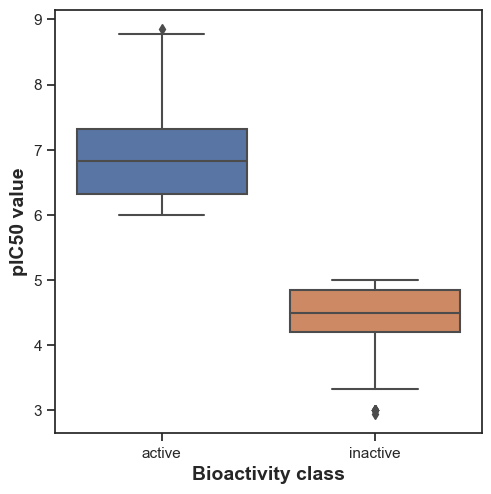

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [28]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [29]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,367004.0,1.083975e-189,0.05,Different distribution (reject H0)


#### **MW**

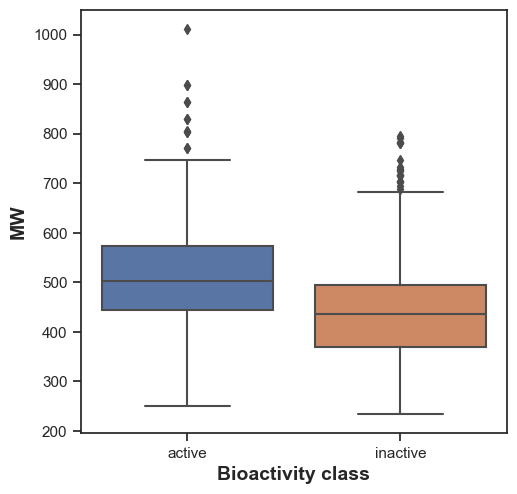

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [31]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,257541.0,2.103276e-32,0.05,Different distribution (reject H0)


#### **LogP**

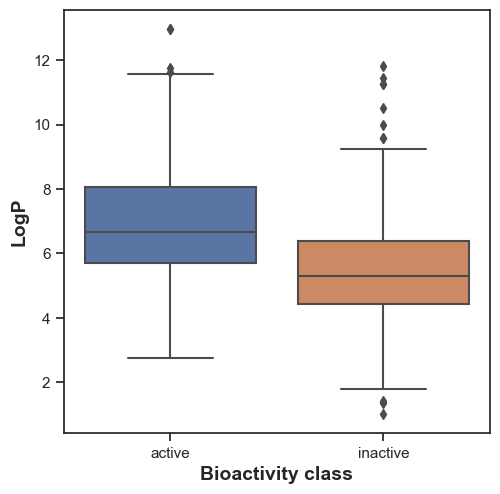

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [33]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,269317.5,6.089067e-43,0.05,Different distribution (reject H0)


#### **NumHDonors**

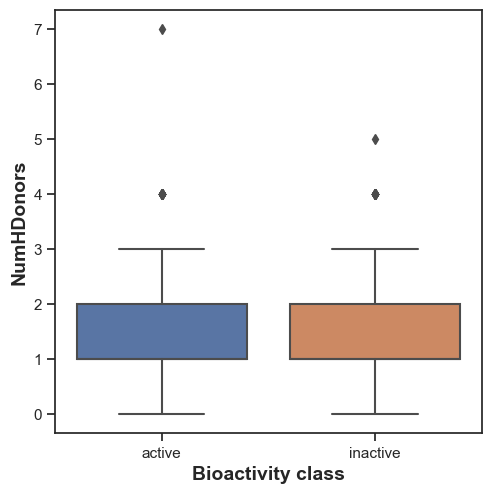

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,199959.5,0.004901,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

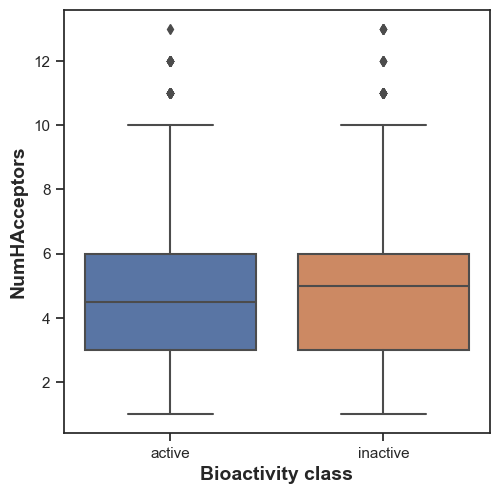

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [37]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,182622.5,0.886902,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

In [38]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: soat_1_bioa_data_preprocessed.csv (deflated 80%)
  adding: output_Sterol O-acyltransferase 1 inhibitors 1703.csv (deflated 88%)
  adding: IC50.csv (deflated 72%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: output2_Sterol O-acyltransferase 1 inhibitors 1703.csv (deflated 88%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 37%)
  adding: final_output.csv (deflated 85%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: Output3_Sterol O-acyltransferase 1 inhibitors 1703.csv (deflated 88%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
